<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-04-03-06-multilevel-glm-gam-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3.6. Generalized Additive Mixed Models (GAMMs)

Generalized Additive Mixed Models (GAMMs) are powerful tools for analyzing complex data structures, allowing for flexible modeling of non-linear relationships while accounting for random effects to handle hierarchical or grouped data. In R, the {mgcv} and {gamm4} packages offer robust and complementary approaches for fitting GAMMs. It bridge the gap between purely parametric models and fully non-parametric approaches, offering unparalleled flexibility and interpretability. By leveraging the capabilities of these packages, you can effectively model complex data patterns and gain insights into the relationships between variables in your data.


## Overview

Generalized Additive Models (GAMs) and their mixed-effects counterpart, Generalized Additive Mixed Models (GAMMs), are advanced statistical techniques that expand upon the capabilities of generalized linear models. These models are particularly useful for capturing non-linear relationships between variables, allowing for greater flexibility in modeling complex data patterns. The GAMs are most useful when your data is independent, and you are focused solely on smooth, non-linear effects. In contrast, GAMMs are employed when your data is hierarchical, clustered, or involves repeated measures, enabling you to account for random effects in addition to smooth effects. For example, a GAM might model crop yield using smooth effects of temperature and rainfall. Alternatively, a GAMM would model crop yield by incorporating smooth effects and accounting for variability across different farms through random effects.

***Key Differences Between GAM (Generalized Additive Model) and GAMM (Generalized Additive Mixed Model)***

| **Feature** | **GAM (Generalized Additive Model)** | **GAMM (Generalized Additive Mixed Model)** |
|---------------|---------------------------|------------------------------|
| **Random Effects** | Does not include random effects. | Includes random effects to account for grouped or hierarchical data structures. |
| **Correlated Data** | Assumes independence of observations. | Handles correlated data, such as repeated measures, through random effects. |
| **Flexibility** | Models only smooth, non-linear effects of predictors. | Combines smooth, non-linear effects with random effects to model both fixed and hierarchical/random structures. |
| **Data Structure** | Suitable for flat data (no clustering or hierarchical structure). | Suitable for hierarchical or clustered data (e.g., patients within hospitals, students within schools). |
| **Formula Structure** | Only includes smooth terms for predictors ($Y = f(X_1) + f(X_2)%).                                                        | Combines smooth terms and random effects ($Y = f(X_1) + f(X_2) + \text{RandomEffects}$). |  |
| **Computational Complexity** | Relatively simpler and faster to compute. | More computationally intensive due to the estimation of random effects. |
| **Example** | Modeling non-linear relationships between temperature and crop yield. | Modeling non-linear relationships between temperature and crop yield, accounting for random effects like variability across regions. |

Components of a GAMM include:

1.  **Response Variable** ($Y$): The outcome variable, which can follow various distributions (e.g., Gaussian, Poisson, Binomial).
2.  **Fixed Effects:** These capture the population-level effects of predictors.
3.  **Smooth Terms:** These describe non-linear relationships between predictors and the response.
4.  **Random Effects:** These capture variation due to grouping or hierarchical structures in the data.
5.  **Link Function:** Relates the predictors to the response variable (e.g., log link for Poisson regression).

A GAMM can be written as:

$$ g(E[Y]) = \beta_0 + \sum_j f_j(X_j) + \mathbf{Z}b $$

where:

-   $g(\cdot)$: Link function.
-   $E[Y]$: Expected value of the response.
-   $\beta_0$: Intercept.
-   $f_j(X_j)$: Smooth functions of predictors $X_j$.
-   $\mathbf{Z}b$: Random effects with $b \sim N(0, \Sigma)$.

For example, you are studying tree growth in a forest. The dataset includes:

-   Response variable ($Y$): Tree height.
-   Fixed predictors: Temperature ($Temp$) and soil pH ($pH$).
-   Random effects: Variability due to location (different forest plots).
-   Smooth terms: Non-linear relationship between temperature and tree height.

The GAMM model cab be written as:

$$ \text{Height}_i = \beta_0 + f_1(Temp_i) + f_2(pH_i) + \text{RandomEffect}_{Plot} + \epsilon_in $$ where:

-   $f_1(Temp_i)$ and $f_2(pH_i)$: Smooth functions capturing the non-linear effects of temperature and pH.
-   RandomEffect$_{Plot}$: Accounts for differences in tree growth across forest plots.
-   $\epsilon_i$: Residual error.

\***Advantages of GAMMs** 1. Flexibility in modeling complex, non-linear relationships. 2. Ability to incorporate random effects for grouped or correlated data. 3. Applicability to a wide range of response variable types.

**When to Use GAMMs**

-   Longitudinal or hierarchical data with non-linear effects.
-   Ecological studies, where natural processes often exhibit non-linear relationships.
-   Epidemiological studies with clustered data (e.g., patients nested in hospitals).





## Install rpy2

In [8]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314971 sha256=495106fd3b8fdf00f31a0d4b02ff76615dabc15d44960a152eb5e67607b29498
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:




In [11]:
%%R
packages <- c('tidyverse',
              'DataExplorer',
              'sjPlot',
              'gam',
              'gamair',
              'mgcv',
              'gamlss',
              'gratia',
              'latticeExtra',
              'gamm4',
              'agridat',
              'itsadug'
              )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [12]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
   tidyverse DataExplorer       sjPlot          gam       gamair         mgcv 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
      gamlss       gratia latticeExtra        gamm4      agridat      itsadug 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 


## Load R Packages

In [13]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:itsadug"       "package:plotfunctions" "package:agridat"      
 [4] "package:gamm4"         "package:lme4"          "package:Matrix"       
 [7] "package:latticeExtra"  "package:lattice"       "package:gratia"       
[10] "package:gamlss"        "package:parallel"      "package:gamlss.dist"  
[13] "package:gamlss.data"   "package:mgcv"          "package:nlme"         
[16] "package:gamair"        "package:gam"           "package:foreach"      
[19] "package:splines"       "package:sjPlot"        "package:DataExplorer" 
[22] "package:lubridate"     "package:forcats"       "package:stringr"      
[25] "package:dplyr"         "package:purrr"         "package:readr"        
[28] "package:tidyr"         "package:tibble"        "package:ggplot2"      
[31] "package:tidyverse"     "package:tools"         "package:stats"        
[34] "package:graphics"      "package:grDevices"     "package:utils"        
[37] "package:datasets"      "package:methods"

## Generalized Additive Mixed Models (GAMM) in R

In this exercise we will learn how to fit Generalized Additive Mixed Models (GAMM) in R using the `gamm4` package. GAMMs are an extension of Generalized Additive Models (GAMs) that allow for the inclusion of random effects in the model. This makes them particularly useful for analyzing data with a hierarchical structure, such as repeated measures or clustered data. In this tutorial, we will walk through the process of fitting a GAMM in R using the {gamm4} package, including specifying the model formula, fitting the model, and interpreting the results. The {gamm4} is based on `gamm` from package {mgcv}, but uses {lme4} rather than {nlme} as the underlying fitting engine. The {gamm4} is more robust numerically than {gamm}, and by avoiding `PQL` gives better performance for binary and low mean count data. Its main disadvantage is that it can not handle most multi-penalty smooths (i.e. not `te` type tensor products or adaptive smooths).


### Data

In this exercise, we will use the `lasrosas.corn` dataset from the {agridat} package. This dataset contains information on corn yield and various environmental factors from a field experiment conducted in Las Rosas, Argentina with variable N application. The dataset includes the following variables:

`year`: year of the experiment, 1999 or 2001

`lat`: latitude

`long`: longitude

`yield`: corn yield, quintals/ha

`nitro`: nitrogen fertilizer, kg/ha

`topo`: topographic factor

`bv`: brightness value (proxy for low organic matter content)

`rep`: blocking factor

`nf`: nitrogen as a factor, N0-N4


In [14]:
%%R
mf = lasrosas.corn
glimpse(mf)

Rows: 3,443
Columns: 9
$ year  <int> 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999…
$ lat   <dbl> -33.05113, -33.05115, -33.05116, -33.05117, -33.05118, -33.05120…
$ long  <dbl> -63.84886, -63.84879, -63.84872, -63.84865, -63.84858, -63.84851…
$ yield <dbl> 72.14, 73.79, 77.25, 76.35, 75.55, 70.24, 76.17, 69.17, 69.77, 6…
$ nitro <dbl> 131.5, 131.5, 131.5, 131.5, 131.5, 131.5, 131.5, 131.5, 131.5, 1…
$ topo  <fct> W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, W, W…
$ bv    <dbl> 162.60, 170.49, 168.39, 176.68, 171.46, 170.56, 172.94, 171.86, …
$ rep   <fct> R1, R1, R1, R1, R1, R1, R1, R1, R1, R1, R1, R1, R1, R1, R1, R1, …
$ nf    <fct> N5, N5, N5, N5, N5, N5, N5, N5, N5, N5, N5, N5, N5, N5, N5, N5, …


### Exploratory Data Analysis

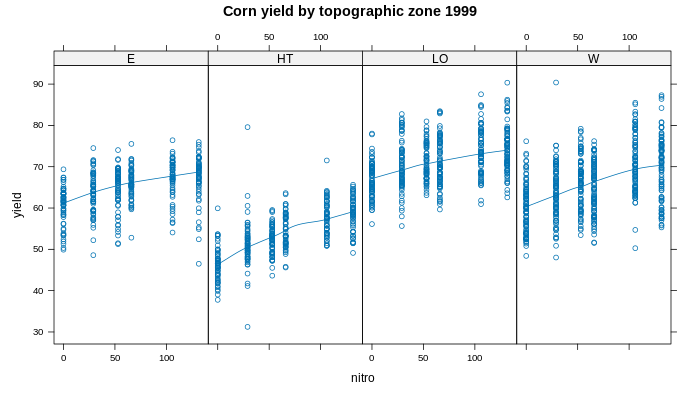

In [17]:
%%R -w 700 -h 400 -u px
# A quadratic response to nitrogen is suggested
d1 <- subset(mf, year==1999)
xyplot(yield~nitro|topo, data=d1, type=c('p','smooth'), layout=c(4,1),
       main="Corn yield by topographic zone 1999")

First we will visualize the data using scatter plots and maps to explore the relationships between the variables in 4 topographic zones.

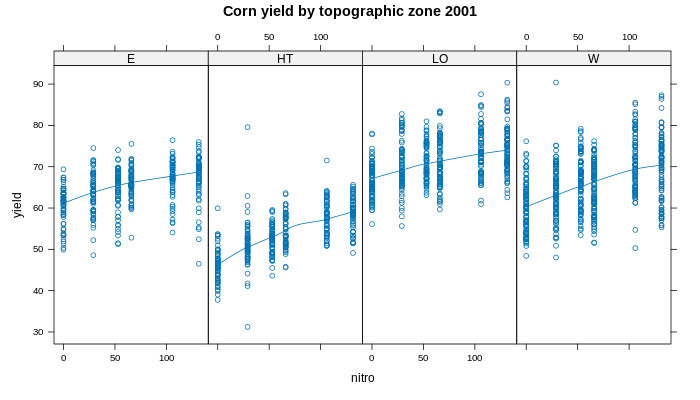

In [16]:
%%R -w 700 -h 400 -u px
# A quadratic response to nitrogen is suggested
d2 <- subset(mf, year==2001)
xyplot(yield~nitro|topo, data=d1, type=c('p','smooth'), layout=c(4,1),
       main="Corn yield by topographic zone 2001")


Then, we will create a scatterplot matrix to visualize the relationships between the variables in the `lasrosas.corn` dataset.

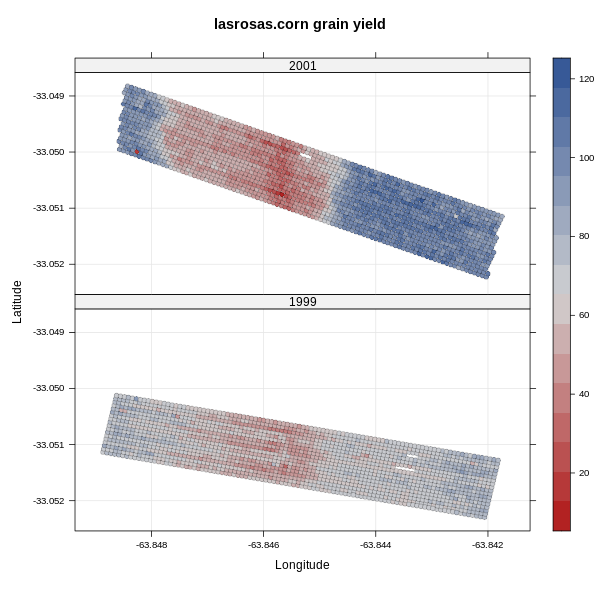

In [18]:
%%R -w 600 -h 600 -u px
libs(lattice,latticeExtra)  # for panel.levelplot.points
redblue <- colorRampPalette(c("firebrick", "lightgray", "#375997"))
levelplot(yield ~ long*lat|factor(year), data=mf,
          main="lasrosas.corn grain yield", xlab="Longitude", ylab="Latitude",
          scales=list(alternating=FALSE),
          prepanel = prepanel.default.xyplot,
          panel = panel.levelplot.points,
          type = c("p", "g"), aspect = "iso", col.regions=redblue)

### Fit GAMM with {mgcv} Package

In the {mgcv} package in R, you can fit a Generalized Additive Mixed Model (GAMM) with different smoothing functions using the `gamm()` function. By specifying different smooth terms (e.g., `s()` for thin plate regression splines, `te()` for tensor product smooths, `ti()` for tensor interactions, and `bs="cr"` for cubic regression splines), you can experiment with various types of smooths.

-   `"tp"`: Thin plate regression spline (default).

-   `"cr"`: Cubic regression spline.

-   `"ps"`: P-spline.

-   `"cs"`: Cyclic cubic regression spline, suitable for cyclic data (e.g., periodic).

-   `te(x, z)`: Tensor product smooth for interactions of multiple covariates.

#### GAMM with One Random Intercept

In this example, we’ll fit a GAMM model using the `gamm()` function  to model the relationship between the `yield` variable and `nitro`, `topo`, and `bv` and `year` with random intercept. The `gamm()` function call  {lme} in the normal errors identity link case, or by a call to {gammPQL} (a modification of {gammPQL} from the {MASS} library) otherwise. In the latter case estimates are only approximately MLEs. The routine is typically slower than `gam`, and not quite as numerically robust.

We’ll use a cubic regression spline with 3 degrees of freedom for `bv` and `nitro` variables. We will use `s()` is the shorthand for fitting smoothing splines in `gamm()` function.

In [19]:
%%R
# Fit the GAMM with random intercepts
gamm_intercept_01 <- gamm(yield ~ s(nitro) + s(bv) + topo, random=list(year=~1), data = mf)
summary(gamm_intercept_01)

    Length Class Mode
lme 18     lme   list
gam 31     gam   list


`gamm()` returns a list with two items:

`lme`: the fitted model object returned by lme or gammPQL. Note that the model formulae and grouping structures may appear to be rather bizarre, because of the manner in which the GAMM is split up and the calls to lme and gammPQL are constructed.


In [20]:
%%R
summary(gamm_intercept_01$lme)

Linear mixed-effects model fit by maximum likelihood
  Data: strip.offset(mf) 
       AIC      BIC    logLik
  27045.92 27107.36 -13512.96

Random effects:
 Formula: ~Xr - 1 | g
 Structure: pdIdnot
              Xr1       Xr2       Xr3       Xr4       Xr5       Xr6       Xr7
StdDev: 0.7188879 0.7188879 0.7188879 0.7188879 0.7188879 0.7188879 0.7188879
              Xr8
StdDev: 0.7188879

 Formula: ~Xr.0 - 1 | g.0 %in% g
 Structure: pdIdnot
           Xr.01    Xr.02    Xr.03    Xr.04    Xr.05    Xr.06    Xr.07    Xr.08
StdDev: 169.2563 169.2563 169.2563 169.2563 169.2563 169.2563 169.2563 169.2563

 Formula: ~1 | year %in% g.0 %in% g
        (Intercept) Residual
StdDev:    6.162527 12.15998

Fixed effects:  y ~ X - 1 
                 Value Std.Error   DF   t-value p-value
X(Intercept)  77.26658  4.385804 3436  17.61742  0.0000
XtopoHT      -24.65428  0.737647 3436 -33.42285  0.0000
XtopoLO        3.48653  0.670062 3436   5.20330  0.0000
XtopoW        -8.76205  0.622251 3436 -14.08122  

`gam`: an object of class gam, less information relating to GCV/UBRE model selection. At present this contains enough information to use predict, summary and print methods and vis.gam, but not to use e.g. the anova method function to compare models. This is based on the working model when using gammPQL.

In [21]:
%%R
summary(gamm_intercept_01$gam)


Family: gaussian 
Link function: identity 

Formula:
yield ~ s(nitro) + s(bv) + topo

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  77.2666     4.3845  17.623  < 2e-16 ***
topoHT      -24.6543     0.7374 -33.433  < 2e-16 ***
topoLO        3.4865     0.6699   5.205 2.06e-07 ***
topoW        -8.7621     0.6221 -14.085  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
           edf Ref.df     F p-value    
s(nitro) 2.366  2.366 60.70  <2e-16 ***
s(bv)    8.391  8.391 64.01  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.527   
  Scale est. = 147.87    n = 3443


The {gratia} package is designed to work with {mgcv} and offers enhanced visualization and diagnostic tools.

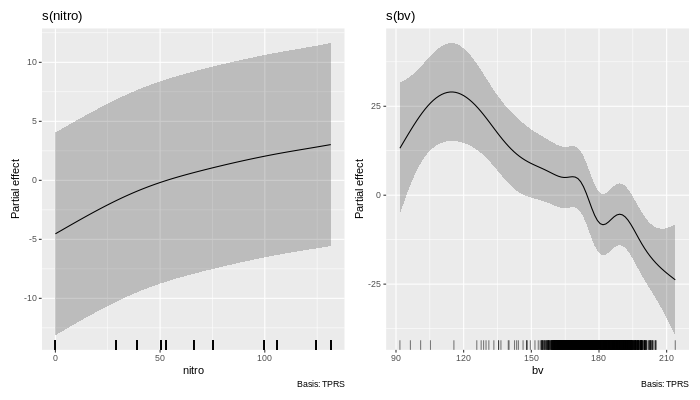

In [22]:
%%R -w 700 -h 400 -u px
# Enhanced visualization
gratia::draw(gamm_intercept_01$gam) # Generates nicely formatted plots

#### GAMM with Multiple Random Effects

In this example, we’ll fit a GAMM model with two random components `year` and `topo` using the `gamm()` function. We will use a cubic regression spline with 3 degrees of freedom for `bv` and `nitro` variables. We will use `s()` is the shorthand for fitting smoothing splines in `gamm()` function.

In [23]:
%%R
# Fit the GAMM with random intercepts
gamm_intercept_02 <- gamm(yield ~ s(nitro) + s(bv),  random=list(year=~1, year=~topo), data = mf)

In [24]:
%%R
# fit the mixed effects Poisson regression model with penalized fixed effects
summary(gamm_intercept_02$lme)

Linear mixed-effects model fit by maximum likelihood
  Data: strip.offset(mf) 
       AIC      BIC    logLik
  25364.56 25469.01 -12665.28

Random effects:
 Formula: ~Xr - 1 | g
 Structure: pdIdnot
              Xr1       Xr2       Xr3       Xr4       Xr5       Xr6       Xr7
StdDev: 0.7664685 0.7664685 0.7664685 0.7664685 0.7664685 0.7664685 0.7664685
              Xr8
StdDev: 0.7664685

 Formula: ~Xr.0 - 1 | g.0 %in% g
 Structure: pdIdnot
           Xr.01    Xr.02    Xr.03    Xr.04    Xr.05    Xr.06    Xr.07    Xr.08
StdDev: 109.1208 109.1208 109.1208 109.1208 109.1208 109.1208 109.1208 109.1208

 Formula: ~1 | year %in% g.0 %in% g
         (Intercept)
StdDev: 2.130579e-19

 Formula: ~topo | year %in% year %in% g.0 %in% g
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev    Corr                
(Intercept) 20.137981 (Intr) topoHT topoLO
topoHT      30.110113 -0.996              
topoLO       4.083107  0.885 -0.924       
topoW       15.162527 -0.98

In [25]:
%%R
summary(gamm_intercept_02$gam)


Family: gaussian 
Link function: identity 

Formula:
yield ~ s(nitro) + s(bv)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  62.4048     0.2691   231.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
           edf Ref.df     F p-value    
s(nitro) 2.721  2.721 90.36  <2e-16 ***
s(bv)    8.174  8.174 85.06  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =   0.24   
  Scale est. = 90.069    n = 3443


#### Model Comparison

Now we will compare the two models using the `anova()` function to see if the model with multiple random effects is significantly better than the model with a single random effect. Here we have use `lme` object from the `gamm_intercept_01` and `gamm_intercept_02` objects.

In [26]:
%%R
anova(gamm_intercept_01$lme, gamm_intercept_02$lme)

                      Model df      AIC      BIC    logLik   Test  L.Ratio
gamm_intercept_01$lme     1 10 27045.92 27107.36 -13512.96                
gamm_intercept_02$lme     2 17 25364.56 25469.01 -12665.28 1 vs 2 1695.354
                      p-value
gamm_intercept_01$lme        
gamm_intercept_02$lme  <.0001


From above output we can see that the model with multiple random effects is significantly better than the model with a single random effect (p < 0.05), suggesting that the additional random effect improves the model fit..

We may use `bam()` function of {mgcv} package to fit both GAM and GAMM models. The `bam()` function uses  a penalized likelihood approach (MEL), which can be more computationally efficient than the `gamm()` function for large datasets. The `bam()` function is particularly useful for fitting GAMs with random effects, as it can handle large datasets more efficiently than the `gamm()` function. The `bam()` function is similar to the `gamm()` function, but it uses a different fitting algorithm that can be more memory-efficient for large datasets. The `bam()` function can be used to fit GAMs with random effects by specifying the random-effect smooths in the model formula.

For example, we can use `bam()` function to fit a GAM without  random-effect. The `by` parameter is used to  the smooths  separately for each level of the nominal variable of  category of `topo`. The `k` parameter is used to specify the number of basis functions to use for the smooth. The `s()` function is used to define the smooths of `nitro` and `bv` with a cubic regression spline basis.

In [27]:
%%R
bam_01 <- bam(yield ~
                s(nitro, by = topo,   k=9) +
                s(bv, k=9),
                data= mf)
summary(bam_01)


Family: gaussian 
Link function: identity 

Formula:
yield ~ s(nitro, by = topo, k = 9) + s(bv, k = 9)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.9745     0.2393   292.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                  edf Ref.df      F  p-value    
s(nitro):topoE  7.921  7.998  42.72  < 2e-16 ***
s(nitro):topoHT 7.720  7.974  16.62  < 2e-16 ***
s(nitro):topoLO 7.948  7.999  64.72  < 2e-16 ***
s(nitro):topoW  1.732  2.131  14.85 7.65e-07 ***
s(bv)           6.405  7.321 317.61  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =    0.5   Deviance explained = 50.5%
fREML =  14044  Scale est. = 196.63    n = 3443


We  can use  `bam()` fuction to fit a GAMM with random-effect smooths of `s(year,bs="re")` and `s(topo, bs="re")`. The first parameter is the random-effect factor, which is interpreted as a random intercept. This function is useful for very large datasets, as it uses a sparse matrix representation of the smooths, which can be more memory-efficient than the `gamm()` function.

In [28]:
%%R
bam_02 <- bam(yield ~
                s(nitro, by = topo,   k=9) +
                s(bv, k=9) +
                s(year,bs="re") +
                s(topo, bs="re"),
                data= mf)
summary(bam_02)


Family: gaussian 
Link function: identity 

Formula:
yield ~ s(nitro, by = topo, k = 9) + s(bv, k = 9) + s(year, bs = "re") + 
    s(topo, bs = "re")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -9830.3      486.2  -20.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                   edf Ref.df      F p-value    
s(nitro):topoE  7.8824  7.995  27.12  <2e-16 ***
s(nitro):topoHT 7.9264  7.998  42.84  <2e-16 ***
s(nitro):topoLO 7.9257  7.998  41.25  <2e-16 ***
s(nitro):topoW  1.0004  1.001  51.36  <2e-16 ***
s(bv)           7.5295  7.930  75.68  <2e-16 ***
s(year)         0.9976  1.000 432.49  <2e-16 ***
s(topo)         2.9961  3.000 597.54  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.699   Deviance explained = 70.3%
fREML =  13191  Scale est. = 118.26    n = 3443


Then, compare the two models using the `compareML()` function  of {itsadyg} package to see if the model with random effects is significantly better than the model without random effects.

In [29]:
%%R
compareML(bam_01, bam_02)

bam_01: yield ~ s(nitro, by = topo, k = 9) + s(bv, k = 9)

bam_02: yield ~ s(nitro, by = topo, k = 9) + s(bv, k = 9) + s(year, bs = "re") + 
    s(topo, bs = "re")

Chi-square test of fREML scores
-----
   Model    Score Edf Difference    Df  p.value Sig.
1 bam_01 14043.95  11                               
2 bam_02 13190.71  13    853.239 2.000  < 2e-16  ***

AIC difference: 1748.25, model bam_02 has lower AIC.



The results show that the model `bam_03` is better since it has a lower AIC score. Therefore, it is better for us to include the random intercepts.

### Fit GAMM with {gamm4} Package


In this exercise we will learn how to fit Generalized Additive Mixed Models (GAMM) in R using the `gamm4` package. GAMMs are an extension of Generalized Additive Models (GAMs) that allow for the inclusion of random effects in the model. This makes them particularly useful for analyzing data with a hierarchical structure, such as repeated measures or clustered data. In this tutorial, we will walk through the process of fitting a GAMM in R using the {gamm4} package, including specifying the model formula, fitting the model, and interpreting the results. The {gamm4} is based on `gamm` from package {mgcv}, but uses {lme4} rather than {nlme} as the underlying fitting engine. The {gamm4} is more robust numerically than {gamm}, and by avoiding `PQL` gives better performance for binary and low mean count data. Its main disadvantage is that it can not handle most multi-penalty smooths (i.e. not `te` type tensor products or adaptive smooths).


The `gamm4()` function fits a GAMM model with random intercepts for the `year` variable. The `random` argument specifies the random effects to include in the model, in this case, a random intercept for the `year` variable. The `s()` function is used to specify the smooth terms for the `nitro` and `bv` variables.

In [30]:
%%R
gamm4_01<- gamm4(yield ~ s(nitro) + s(bv)+ topo, random=~(1|year), data = mf)
summary(gamm4_01)

    Length Class   Mode
mer  1     lmerMod S4  
gam 32     gam     list


`gam` an object of class gam. At present this contains enough information to use predict, plot, summary and print methods and `vis.gam`, from package `mgcv` but not to use e.g. the anova method function to compare models.

In [31]:
%%R
summary(gamm4_01$gam)


Family: gaussian 
Link function: identity 

Formula:
yield ~ s(nitro) + s(bv) + topo

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  77.2644     6.1831  12.496  < 2e-16 ***
topoHT      -24.6568     0.7374 -33.437  < 2e-16 ***
topoLO        3.4911     0.6699   5.211 1.98e-07 ***
topoW        -8.7566     0.6221 -14.076  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
           edf Ref.df     F p-value    
s(nitro) 2.675  2.675 54.16  <2e-16 ***
s(bv)    8.405  8.405 63.96  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.527   
lmer.REML =  27012  Scale est. = 148.03    n = 3443


`mer`: The fitted model object returned by `lmer` or `glmer`. Extra random and fixed effect terms will appear relating to the estimation of the smooth terms. Note that unlike `lme` objects returned by `gamm`, everything in this object always relates to the fitted model itself, and never to a `PQL` working approximation: hence the usual methods of model comparison are entirely legitimate.

In [32]:
%%R
summary(gamm4_01$mer)

Linear mixed model fit by REML ['lmerMod']

REML criterion at convergence: 27012.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2393 -0.7916  0.0125  0.7771  3.2965 

Random effects:
 Groups   Name        Variance  Std.Dev.
 Xr       s(nitro)    9.018e-01   0.9496
 Xr.0     s(bv)       2.949e+04 171.7409
 year     (Intercept) 7.604e+01   8.7198
 Residual             1.480e+02  12.1666
Number of obs: 3443, groups:  Xr, 8; Xr.0, 8; year, 2

Fixed effects:
             Estimate Std. Error t value
X(Intercept)  77.2644     6.1831  12.496
XtopoHT      -24.6568     0.7374 -33.437
XtopoLO        3.4911     0.6699   5.211
XtopoW        -8.7566     0.6221 -14.076
Xs(nitro)Fx1   2.9841     0.8393   3.556
Xs(bv)Fx1     -2.9211     4.1224  -0.709

Correlation of Fixed Effects:
            X(Int) XtopHT XtopLO XtopoW Xs(n)F1
XtopoHT     -0.051                             
XtopoLO     -0.050  0.360                      
XtopoW      -0.055  0.467  0.413               
Xs(nitr)Fx1  

## Summary and Conclusions

Generalized Additive Mixed Models (GAMMs) are powerful tools for analyzing complex data structures, allowing for flexible modeling of non-linear relationships while accounting for random effects to handle hierarchical or grouped data.   The `gamm()` and `bam()` functions from the {mgcv} package is a versatile tool for fitting GAMMs with a wide range of smooth terms and random effects. The `gamm4()` function from the {gamm4} package provides a more robust and numerically stable alternative to `gamm()` for fitting GAMMs with random effects. By leveraging the capabilities of these packages, you can effectively model complex data patterns and gain insights into the relationships between variables in your data.



## References

1.  [A Beginner's Guide to Generalized Additive Mixed Models with R (2014](https://www.highstat.com/index.php?view=article&id=22&catid=18)

2.  [Using random effects in GAMs with mgcv](https://fromthebottomoftheheap.net/2021/02/02/random-effects-in-gams/)

3.  [Generalized Additive Mixed Models](https://stat.ethz.ch/R-manual/R-devel/library/mgcv/html/gamm.html)

4.  [gamm4: Generalized Additive Mixed Models using lme4 and mgcv](https://rdrr.io/cran/gamm4/man/gamm4.html)

5.  [Using Generalised Additive Mixed Models (GAMMs) to Predict Visitors to Edinburgh and Craigmillar Castles](https://thedatalab.com/technical-skills/using-generalised-additive-mixed-models-gamms-to-predict-visitors-to-edinburgh-and-craigmillar-castles/)

6.  [An introduction to Generalised Additive Mixed Models (GAMMs)](https://yeungpinghei.github.io/)

7.  [Generalized Additive Models and Mixed-Effects in Agriculture](https://r-video-tutorial.blogspot.com/2017/07/generalized-addictive-models-and-mixed.html)



